In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from pathlib import Path
import os
from MitoCode_Functions import GetData, GetVolume
# imports   

In [2]:
def Dist(pointOne, pointTwo): 
    a = 0 
    for i in range(len(pointOne)):  # this allows us to consider it for an n dimensional array
        a += (pointOne[i] - pointTwo[i])**2
    return np.sqrt(a)
    
# calculate the distance between two points

In [3]:
class node: 
    def __init__(self, dat, pointer, dist, conn): 
        self.start = dat 
        self.next = pointer
        self.dist = dist
        self.conn = conn
# class for a node

In [4]:
# getting the files 
# /home.
# direct = "/home/biratal/Desktop/Biolab/PRE96/tif1" # enter the directory of where the mitograph-generated files are
direct = "/Users/birat/Onedrive/Desktop/stuff/PRE96/tif1/"
nodeDist, nodeLists, skelePos, compList = GetData(direct)
# nodeDist1, nodeList1, skelePos1, compList1 = GetData("/home/biratal/Desktop/Biolab/PRE96/tif2")

In [5]:
def getVolumeAndGroup(nodeTree, compList): # adds volume and group 
    nodeTree["Volume"] = None
    nodeTree["Group"] = None
    ntv = nodeTree.values
    clv = compList.values
    for i in ntv: 
        for j in clv:
            if i[0] == j[0] or i[1] == j[0]: 
                i[3] = j[2]
                i[4] = j[1]
    nodeTree = pd.DataFrame(ntv, columns=["X", "Y", "dist", "Volume", "Group"])
    return nodeTree
def cleanNodeDist(nodeDist, compList):  # function to clean the nodeDist, as it is has different columns
    a = nodeDist[nodeDist.columns[0]]
    lis = np.array(list(a.items()), dtype = object)
    A = []

    for i in lis: 
        A.append([i[0], i[1]])
    nlis = np.array(lis, dtype = object)
    X = []
    Y = []
    dist = []

    for i in range(len(nlis)): 
        x, y = nlis[i][0]
        X.append(x)
        Y.append(y)
        dist.append(nlis[i][1])

    X = np.array(X)
    Y = np.array(Y)
    dist = np.array(dist)
    nTree = pd.DataFrame({"X": X, "Y":Y, "dist":dist})
    return getVolumeAndGroup(nTree, compList)

In [6]:
a = cleanNodeDist(nodeDist, compList)
a.loc[a["Group"] == 3]
nodeTree = cleanNodeDist(nodeDist, compList)


In [7]:

# cleaning data for node coordinates
A = []
for i in nodeLists.columns: 
    A.append(float(i))
Blist = []
Blist.append(A)
# 
for i in nodeLists.values: 
    Blist.append(list(i))
nodeCoordinates = pd.DataFrame(np.array(Blist), columns= ["x", "y", "z"])

In [13]:
roundSkele = skelePos.round(4)

a = nodeCoordinates[['x', 'y', 'z']].values.tolist()
b = roundSkele[['x', 'y', 'z']].values.tolist()

roundSkele["nodeState"] = False
roundSkele["node"] = None
notFoundList = [] # list for coordinates that weren't found because of rounding

for i in range(len(b)): 
    for j in range(len(a)): 
        if b[i] == a[j]: 
            roundSkele.at[i, "nodeState"] = True
            roundSkele.at[i, "node"] = j
# adding nodes

In [16]:
maxline_id = max(roundSkele.line_id.values)

roundSkele["cc"] = None
test = []

def FindGroup(df, compList): 
    Node = list(filter(None, df.node.values))[0]
    n = list(compList.values[:, 0])
    cc = compList.values[:, 1]
    return cc[n.index(Node)]

for i in range(maxline_id + 1):
    df = roundSkele.loc[roundSkele.line_id == i]
    test.append(df)

for i in range(len(test)): 
    test[i].cc = FindGroup(test[i], compList)

bigDf = pd.concat(test)

#adding groups

C:\Users\birat\AppData\Local\Temp\ipykernel_8296\2020058592.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i].cc = FindGroup(test[i], compList)


In [102]:
def findLength(df): # find's length of the entire thing
    vals = df[['x', 'y', 'z']].values
    disList = []
    for i in range(len(vals) - 1): 
        disList.append(Dist(vals[i], vals[i + 1]))
    return sum(disList)

def findVolume(df): 
    vals = df[['x', 'y', 'z']].values
    widths = df['width_(um)'].values
    volume = []
    for i in range(len(vals) - 1):
        diff_of_vals = vals[i + 1] - vals[i]
        avg_width = (widths[i + 1] + widths[i])/2
        volume.append(np.sqrt((diff_of_vals * avg_width)**2))
    return sum(volume)[0]

def findAvgWidth(df): 
    widths = df['width_(um)'].values
    return np.mean(widths)

def findNumberofNodes(df): 
    return len(df.loc[df.nodeState == True])

def findPixelIntensity(df): 
    pixint = df.pixel_intensity.mean()
    return pixint

findPixelIntensity(bigDf[bigDf.cc == 100])

224.46722166666663

In [103]:
maxcc = max(bigDf.cc)
dat = []
datfunc = []
for i in range(int(maxcc + 1)):
    d = bigDf[bigDf.cc == i]
    dat.append([i, findLength(d), findVolume(d), findAvgWidth(d), findNumberofNodes(d)])
    datfunc.append([findPixelIntensity(d)])

dat =np.array(dat)

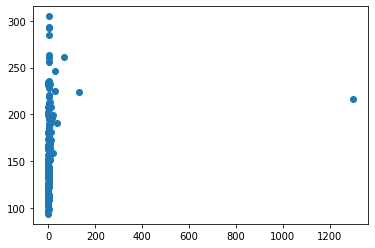

In [104]:
plt.scatter(dat[:, 1], datfunc)


In [40]:


findAvgWidth(bigDf[bigDf.cc == 1])
findVolume(bigDf[bigDf.cc == 1])


0.3092586206896552

In [32]:
bigDf.loc[bigDf.line_id == 1]

,line_id,point_id,x,y,z,width_(um),pixel_intensity,nodeState,node,cc
7,1,0,20.904,4.368,3.0,0.2775,244.1667,True,691,150.0
8,1,1,21.008,4.368,3.0,0.4344,232.3333,False,None,150.0
9,1,2,21.112,4.368,3.0,0.3609,223.3333,True,690,150.0


In [25]:
bigDf.loc[bigDf.cc == 1]

,line_id,point_id,x,y,z,width_(um),pixel_intensity,nodeState,node,cc
3631,536,0,14.0400,12.7920,14.0000,0.2052,125.5000,True,34,1.0
3632,536,1,14.1440,12.7658,14.1667,0.3128,137.6667,False,None,1.0
3633,536,2,14.2480,12.7146,14.3148,0.4550,184.5000,False,None,1.0
3634,536,3,14.3520,12.6959,14.4259,0.4613,217.1667,False,None,1.0
3635,536,4,14.4560,12.7185,14.4815,0.5180,280.0000,False,None,1.0
3636,536,5,14.5600,12.7920,14.4815,0.5125,277.8333,False,None,1.0
3637,536,6,14.6640,12.8657,14.4259,0.4766,227.8333,False,None,1.0
3638,536,7,14.7680,12.8921,14.3333,0.4282,175.6667,False,None,1.0
3639,536,8,14.8721,12.8999,14.2593,0.3093,181.6667,False,None,1.0
3640,536,9,14.9774,12.9278,14.2593,0.2622,130.6667,False,None,1.0


In [60]:
# find the closest coordinate 
min  = np.inf
pos = 0
foundCor = 0 
for i in notFoundList: 
    for j in b: 
        pos += 1
        g = Dist(a[i], j)
        if g < min: 
            foundCor = j
            min = g
roundSkele.loc[roundSkele.x == 0.624]

,line_id,point_id,x,y,z,width_(um),pixel_intensity,node,nodeState
6,0,6,0.624,6.7600,3.0000,0.4041,335.3333,689,True
10,2,0,0.624,6.7600,3.0000,0.4041,335.3333,None,False
19,3,0,0.624,6.7600,3.0000,0.4041,335.3333,None,False
1422,188,12,0.624,5.0223,4.4815,0.3640,345.5000,None,False
1429,188,19,0.624,5.5894,4.0556,0.3549,273.8333,None,False


0.2079999999999984

In [15]:
def plotMito(PreOrPost, j = -1): # takes in a pre or post image
    x = []
    y = []
    z = []
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111, projection='3d')
    if j != -1: 
        a = PreOrPost.loc[PreOrPost["line_id"] == j]
        x.append(a["x"].values)
        y.append(a["y"].values)
        z.append(a["z"].values)
    else:
        for k in range(PreOrPost["line_id"].max()):
        # for k in range(100):
            a = PreOrPost.loc[PreOrPost["line_id"] == k]
            x.append(a["x"].values)
            y.append(a["y"].values)
            z.append(a["z"].values)
    for i in range(len(x)): 
        plt.scatter(x[i], y[i] ,z[i], marker="." )
    plt.xlabel("X (um)")
    plt.ylabel("Y (um)")

    return fig

In [18]:
def plotMitoWithNode(PreOrPost, nodeDf, down = 0, up = 100): # takes in a pre or post image
    x = []
    y = []
    z = []

    nX = []
    nY = []
    nZ = []

    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111, projection='3d')

    for k in range(down, up):
        a = PreOrPost.loc[PreOrPost["line_id"] == k]
       
        x.append(a["x"].values)
        y.append(a["y"].values)
        z.append(a["z"].values)

        na = nodeDf.loc[nodeDf["line_id"] == k]
        nX.append(na["x"].values)
        nY.append(na["y"].values)
        nZ.append(na["z"].values)

    for i in range(len(x)): 
        plt.scatter(x[i], y[i] ,z[i], marker=".", color = "blue" )
        plt.scatter(nX[i], nY[i], nZ[i], color = 'red')
    plt.xlabel("X (um)")
    plt.ylabel("Y (um)")
    return 1

In [19]:
def plotMitoWithNode2(PreOrPost, nodeDf, down = 0, up = 100): # takes in a pre or post image
    x = []
    y = []
    z = []

    nX = []
    nY = []
    nZ = []

    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111, projection='3d')

    for k in range(down, up):
        a = PreOrPost.loc[PreOrPost["line_id"] == k]
       
        x.append(a["x"].values)
        y.append(a["y"].values)
        z.append(a["z"].values)

        na = nodeDf.loc[nodeDf["line_id"] == k]
        nX.append(na["x"].values)
        nY.append(na["y"].values)
        nZ.append(na["z"].values)

    for i in range(len(x)): 
        plt.scatter(x[i], y[i] ,z[i], marker=".", color = "blue" )
        plt.scatter(nX[i], nY[i], nZ[i], color = 'red')
    plt.xlabel("X (um)")
    plt.ylabel("Y (um)")
    return 1

In [157]:
dt =[]
for i in range(70): 
    a = skelePos.loc[skelePos["line_id"] == i]
    width = skelePos.loc[skelePos["line_id"] == i].mean()["width_(um)"]
    pixelIntensity = skelePos.loc[skelePos["line_id"] == i].mean()["pixel_intensity"]
    a["avgwidth"] = [width] * len(a)
    a["avgpixelIntensity"] = [pixelIntensity] * len(a)

    dt.append(a)

C:\Users\birat\AppData\Local\Temp\ipykernel_10976\3586055512.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["avgwidth"] = [width] * len(a)
C:\Users\birat\AppData\Local\Temp\ipykernel_10976\3586055512.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["avgpixelIntensity"] = [pixelIntensity] * len(a)
C:\Users\birat\AppData\Local\Temp\ipykernel_10976\3586055512.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [164]:
indexList = []
for i in range(len(nodeCoordinates)): 
    indexList.append(i)
    
nodeCoordinates["node"] = indexList 
# nodeCoordinates # contains node positions and node name

In [166]:
w = []
pi = []
for i in dt: 
    w.append(i["avgwidth"].values[0])
    pi.append(i["avgpixelIntensity"].values[0])


Text(0, 0.5, 'functional, pixel intensity')

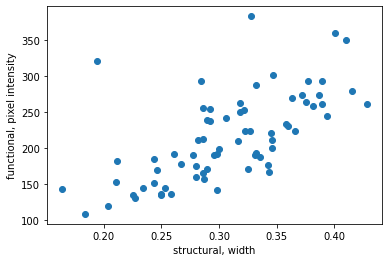

In [167]:
plt.scatter(w, pi)
plt.xlabel("structural, width")
plt.ylabel("functional, pixel intensity")

In [ ]:
# # recursive function to get the different branches, get it manually 
# # doesn't work for larger ones 

# mnemonicList = []

# def getPath(conList, nodeOne, print = True): # list of connections, start node
#     if print == True: 
#         if nodeOne.next == -1:
#             return conList.append(nodeOne.start)
#         for i in nodeOne.conn: 
#             conList.append(i.start)
#             (getPath(conList, i))
#         return conList
#     else: 
#         if nodeOne.next == -1:
#             return conList.append(nodeOne)
#         for i in nodeOne.conn: 
#             conList.append(i)
#             (getPath(conList, i, False))
#         return conList

# def printPath(a): 
#     i = 0 
#     while i < len(a) - 1:
#         if a[i + 1] != a[i]: 
#             print(a[i], end = "-> ")
#             i += 1
#         else: 
#             print(a[i])
#             i += 2
#             print("  \t", end = "")
            
# k = -2
# a = getPath([nodeList[k].start], nodeList[k], print = True)
# b = getPath([nodeList[k]], nodeList[k], print = False)
# def getBranchdf (a):
#     dfList = []
#     pointList = []
#     for i in a: 
#         if i not in pointList: 
#             pointList.append(i)
#             try: 
#                 dfList.append(nodeTree.loc[nodeTree["X"] == i]) 
#             except: 
#                 IndexError
#     return pd.concat(dfList)
    
# def getGlobalDfList(originNodeList):
#     globalDfList = []
#     for k in range(len(originNodeList)): 
#         a = getBranchdf(getPath([originNodeList[k].start], originNodeList[k], print = True))
#         globalDfList.append(a)
#     return globalDfList

In [ ]:

# def createNodeList(nodeTree): # creates a list of nodes from a dataframe and returns it
#     arr = np.array(nodeTree.values)
#     startArr = arr[:, 0] # node 1
#     nextArr = arr[:, 1] # node 2 
#     distArr = arr[:, 2] # distance 

#     # nodes with connections
#     nodeList = []
#     for i in range(len(startArr)): 
#         nodeList.append(node(startArr[i], nextArr[i], distArr[i], []))

#     # nodes without connections

#     for i in nextArr: 
#         if i not in startArr: 
#             nodeList.append(node(i, -1, 0, []))

#     # if a mitochondria branches out from one point to several, we need a dummy node that points to it

#     bunchem = []
#     for i in startArr: # ones with many branches but nothing pointng to it
#         if np.count_nonzero(startArr == i) > 1: 
#             if i not in nextArr: 
#                 bunchem.append(i)

#     bunchem = list(set(bunchem))
#     all = np.append(nextArr, startArr)
#     count = max(all) + 1

#     for i in bunchem: 
#         nodeList.append(node(count, i, 0, [] ))
#         count += 1

#     return nodeList

# # find the start points of the mitochondria branching
# def getOrigins(nodeList): # returns originNodeList and a list with the origins in it
#     origins = []
#     startArr2 = []
#     nextArr2 = []

#     for i in nodeList: 
#         startArr2.append(i.start)
#         nextArr2.append(i.next) 

#     for i in startArr2: 
#         if i not in nextArr2: 
#             origins.append(i)

#     originNodeList = []

#     for i in origins: 
#         for j in nodeList: 
#             if j.start == i: 
#                 originNodeList.append(j)
    
#     return originNodeList, origins

# def getConnections(nodeList): 
#     for i in nodeList: 
#         tempList = []
#         for j in nodeList:
#             if i.next == j.start: 
#                 tempList.append(j)
#         i.conn = tempList
    
# nodeList = createNodeList(nodeTree)
# originNodeList, origins = getOrigins(nodeList)
# getConnections(nodeList)

In [ ]:
# def numOfNodes(df): 
#     return len(set(np.append(df["X"].values, df["Y"].values)))



# def getPost(skelePos, coordinates, node):
#     coors = coordinates[node]
#     a = coors[0]
#     b = coors[1]
#     c = coors[2]
#     first = skelePos.loc[skelePos["x"] == a]
#     if len(first) == 0: 
#             return print("didn't work")
#     if len(first) > 1: 
#         second = first.loc[first["y"] == b]
#         second.at[0, "node"] = node
#         if len(second) == 0: 
#             return print("didn't work")
#         if len(second) > 1: 
#             third = second.loc[second["z"] == c]
#             third.at[0, "node"] = node
#             if len(third) == 1: 
#                 if len(third) == 0: 
#                     return print("didn't work")
#                 return third
#         else: 
#             if len(second) == 1: 
#                 return second 
#     else: 
#         first.at[0, "node"] = node
#         gotIt = True
#         if len(first) == 1:
#             return first

# roundSkele = skelePos.round(4)
# df = []
# for i in range(114):
#     a = getPost(roundSkele, nodeCoordinates.values, i)
#     df.append(a)

